# تطبيق تقنيات الثكثل مع تطبيع البيانات

#  **1.Dataset Analysis**

In [1]:
# import cell
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,MiniBatchKMeans,SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import norm 
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score
import seaborn as sn

## 1.1 Load the Data

In [2]:
data = pd.read_csv("BC.csv") 
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


# **4.Cluster validation**

In [3]:
BC=pd.read_excel('Agglomerative.xlsx')

In [4]:
BC

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,Agglomerative
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,1
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,1
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,1
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,1
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


# 4.1 Confusion Matrix for All Models

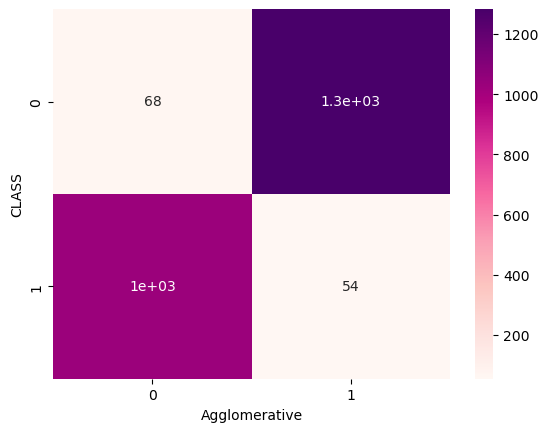

In [5]:
# Agglomerative
confusion_matrix=pd.crosstab(data.CLASS, BC.Agglomerative)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
plt.show()

Agglomerative  confusion_matrix
[[  68 1283]
 [1030   54]]


Text(50.722222222222214, 0.5, 'Acutl')

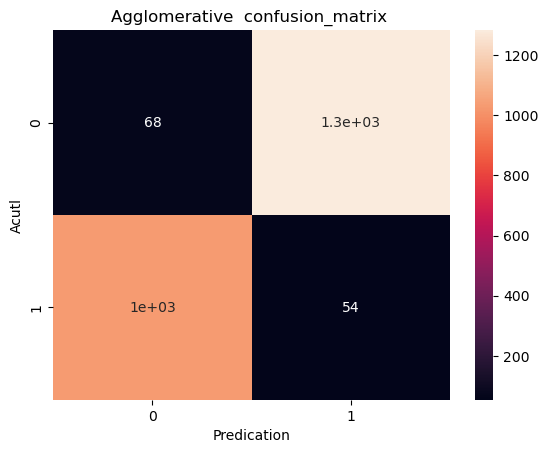

In [6]:
from sklearn.metrics import confusion_matrix

print("Agglomerative  confusion_matrix")

cm=confusion_matrix(data.CLASS, BC.Agglomerative)
#cm=confusion_matrix(y_test,D_classifier.predict(X_test))
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Agglomerative  confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [7]:
y_Agglomerative=BC.Agglomerative
y_Agglomerative

0       1
1       1
2       1
3       1
4       1
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: Agglomerative, Length: 2435, dtype: int64

In [8]:
# Hierarchical 
f1_score_Hierarchical=f1_score(data.CLASS,BC.Agglomerative,average='weighted')
print("F-score: " ,f1_score_Hierarchical)

mutual_info_score_Hierarchical=normalized_mutual_info_score(data.CLASS,BC.Agglomerative)
print("Normalized mutual information: ",mutual_info_score_Hierarchical)

rand_score_Hierarchical=rand_score(data.CLASS,BC.Agglomerative)
print("Rand Statistic:",rand_score_Hierarchical)

F-score:  0.05067013776147257
Normalized mutual information:  0.7117775600868069
Rand Statistic: 0.9047761098334849


In [9]:
# DBSCAN
BC=pd.read_excel('DBSCAN.xlsx')

In [10]:
BC

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,DBSCAN
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


DBSCAN  -1     0   1
CLASS               
0        0  1334  17
1       10  1074   0


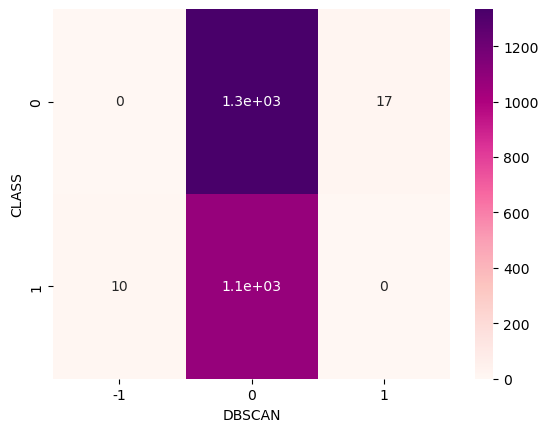

In [11]:
# DBSCAN 
confusion_matrix=pd.crosstab(data.CLASS, BC.DBSCAN)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

In [12]:
y_DBSCAN=BC.DBSCAN
y_DBSCAN

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: DBSCAN, Length: 2435, dtype: int64

In [13]:
# DBSCAN

f1_score_DBSCAN=f1_score(data.CLASS,y_DBSCAN,average='weighted')
print("F-score: " ,f1_score_DBSCAN)

mutual_info_score_DBSCAN=normalized_mutual_info_score(data.CLASS,y_DBSCAN)
print("Normalized mutual information: ",mutual_info_score_DBSCAN)

rand_score_DBSCAN=rand_score(data.CLASS,y_DBSCAN)
print("Rand Statistic:",rand_score_DBSCAN)

F-score:  0.39379471472436045
Normalized mutual information:  0.019692954320072523
Rand Statistic: 0.5052519154550777


In [14]:
# gaussianMixture
BC=pd.read_excel('GaussianMixture.xlsx')
BC

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,GaussianMixture
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


GaussianMixture     0     1
CLASS                      
0                1295    56
1                  56  1028


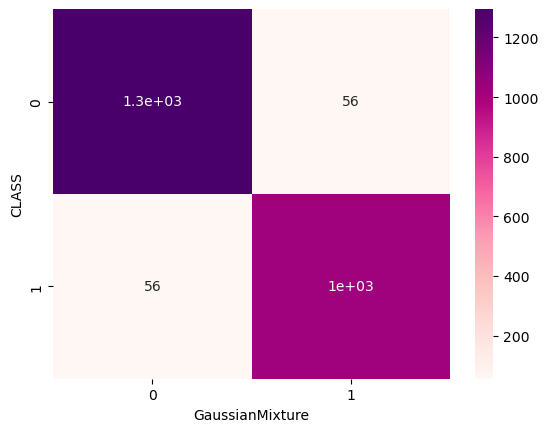

In [15]:
# GMM 
confusion_matrix=pd.crosstab(data.CLASS, BC.GaussianMixture)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

In [16]:
y_Gaussian=BC.GaussianMixture
y_Gaussian

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: GaussianMixture, Length: 2435, dtype: int64

In [17]:
# GMM

f1_score_GMM=f1_score(data.CLASS,y_Gaussian,average='weighted')
print("F-score: " ,f1_score_GMM)

mutual_info_score_GMM=normalized_mutual_info_score(data.CLASS,y_Gaussian)
print("Normalized mutual information: ",mutual_info_score_GMM)

rand_score_GMM=rand_score(data.CLASS,y_Gaussian)
print("Rand Statistic:",rand_score_GMM)

F-score:  0.9540041067761807
Normalized mutual information:  0.7289271622662791
Rand Statistic: 0.912203401841469


In [18]:
#KMeans
BC=pd.read_excel('KMeansLabels.xlsx')
BC

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,KMeansLabels
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,1
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,1
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,1
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,1
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


KMeansLabels    0     1
CLASS                  
0              50  1301
1             979   105


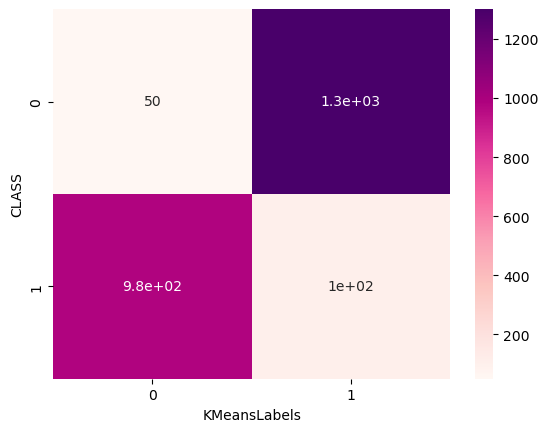

In [19]:
 
confusion_matrix=pd.crosstab(data.CLASS, BC.KMeansLabels)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

In [20]:
y_KMeans=BC.KMeansLabels
y_KMeans

0       1
1       1
2       1
3       1
4       1
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: KMeansLabels, Length: 2435, dtype: int64

In [21]:
# k-means 
f1_score_kmeans=f1_score(data.CLASS,y_KMeans,average='weighted')
print("F-score: " ,f1_score_kmeans)

mutual_info_score_kmeans=normalized_mutual_info_score(data.CLASS,y_KMeans)
print("Normalized mutual information: ",mutual_info_score_kmeans)

rand_score_kmeans=rand_score(data.CLASS,y_KMeans)
print("Rand Statistic:",rand_score_kmeans)

F-score:  0.06085683475537614
Normalized mutual information:  0.6601877855435659
Rand Statistic: 0.8807448888858893


In [22]:
#KMedoids
BC=pd.read_excel('KMedoids.xlsx')
BC

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,KMedoids
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


KMedoids     0    1
CLASS              
0         1306   45
1          130  954


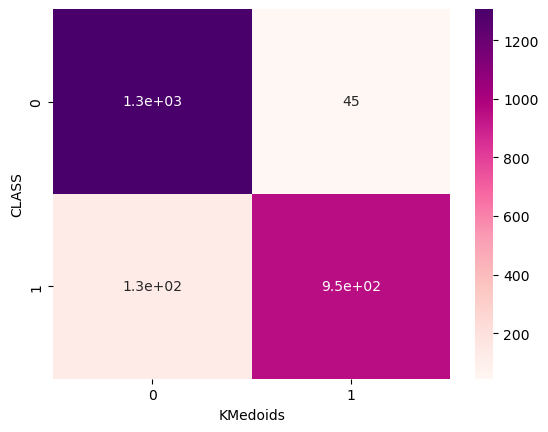

In [23]:
confusion_matrix=pd.crosstab(data.CLASS, BC.KMedoids)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

In [24]:
y_KMedoids=BC.KMedoids
y_KMedoids

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: KMedoids, Length: 2435, dtype: int64

In [33]:
 
f1_score_KMedoids=f1_score(data.CLASS,y_KMedoids,average='weighted')
print("F-score: " ,f1_score_kmeans)

mutual_info_score_KMedoids=normalized_mutual_info_score(data.CLASS,y_KMedoids)
print("Normalized mutual information: ",mutual_info_score_kmeans)

rand_score_KMedoids=rand_score(data.CLASS,y_KMedoids)
print("Rand Statistic:",rand_score_KMedoids)

F-score:  0.06085683475537614
Normalized mutual information:  0.6601877855435659
Rand Statistic: 0.8665382103971965


In [26]:
# minibatch
BC=pd.read_excel('minibatch.xlsx')
BC

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,minibatch
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


minibatch     0    1
CLASS               
0          1301   50
1           113  971


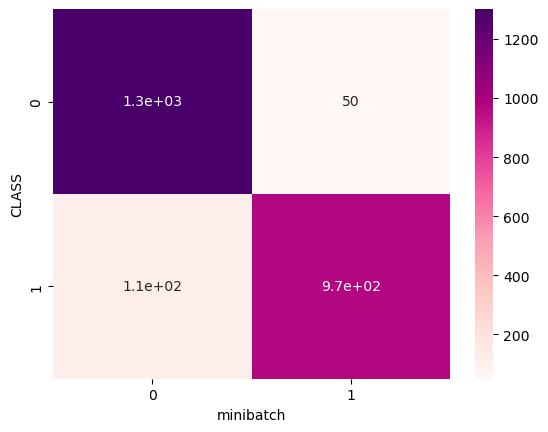

In [27]:
confusion_matrix=pd.crosstab(data.CLASS, BC.minibatch)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

In [28]:
y_minibatch=BC.minibatch
y_minibatch

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: minibatch, Length: 2435, dtype: int64

In [29]:
# minibatch

f1_score_minibatch=f1_score(data.CLASS,y_minibatch,average='weighted')
print("F-score: " ,f1_score_minibatch)

mutual_info_score_minibatch=normalized_mutual_info_score(data.CLASS,y_minibatch)
print("Normalized mutual information: ",mutual_info_score_minibatch)

rand_score_minibatch=rand_score(data.CLASS,y_minibatch)
print("Rand Statistic:",rand_score_minibatch)

F-score:  0.9328204392715673
Normalized mutual information:  0.6486293975248314
Rand Statistic: 0.8750298222140485


# 4.2 Accuracy for All Models 

**3 Index Measurements:**
1. F-meaures
2. Normalized mutual information
3. Rand Statistic

In [35]:
df12 = pd.DataFrame({'models':['kmeans',
                               'KMedoids',
                               'Hierarchical',
                               'dbscan',
                               'gaussian mixture',
                               'MiniBatchKMeans' ,
                               ]
                     
                     ,'f1_score':[f1_score_kmeans,
                                  f1_score_KMedoids,
                                  f1_score_Hierarchical,
                                  f1_score_DBSCAN,
                                  f1_score_GMM,
                                  f1_score_minibatch]
                     
                     ,'Normalized mutual information':[mutual_info_score_kmeans,
                                                       mutual_info_score_KMedoids,
                                                 mutual_info_score_Hierarchical,
                                                 mutual_info_score_DBSCAN,
                                                 mutual_info_score_GMM,
                                                 mutual_info_score_minibatch]
                     
                     ,'Rand Statistic':[rand_score_kmeans,
                                       rand_score_KMedoids,
                                        rand_score_Hierarchical,
                                        rand_score_DBSCAN,
                                        rand_score_GMM,
                                        rand_score_minibatch]})
df12

,models,f1_score,Normalized mutual information,Rand Statistic
0,kmeans,0.060857,0.660188,0.880745
1,KMedoids,0.927761,0.634328,0.866538
2,Hierarchical,0.050670,0.711778,0.904776
3,dbscan,0.393795,0.019693,0.505252
4,gaussian mixture,0.954004,0.728927,0.912203
5,MiniBatchKMeans,0.932820,0.648629,0.875030


Text(0, 0.5, 'scores')

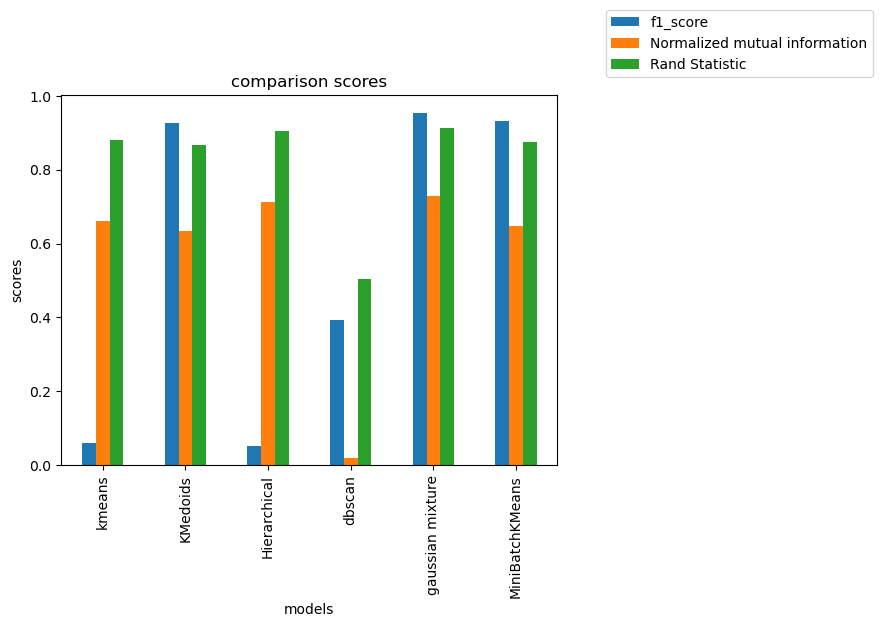

In [36]:
df12.plot( x="models", y=["f1_score","Normalized mutual information","Rand Statistic"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison scores")
plt.xlabel("models")
plt.ylabel("scores")
